# Exploratory Data Analysis

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
production = pd.read_csv('processed data/production.csv', encoding='ISO-8859-1').drop(['Unnamed: 0'], axis = 1)

balance_historic = pd.read_csv('processed data/balance_historic.csv', encoding='ISO-8859-1').drop(['Unnamed: 0'], axis = 1)

balance = pd.read_csv('processed data/balance.csv', encoding='ISO-8859-1').drop(['Unnamed: 0'], axis = 1)

countries = pd.read_csv('processed data/countries.csv', encoding='ISO-8859-1').drop(['Unnamed: 0'], axis = 1)

print('production shape: ', production.shape)
print('balance shape: ', balance.shape)
print('balance_historic shape: ', balance_historic.shape)

display(production.head())
display(balance.head())
display(balance_historic.head())
countries.head()

production shape:  (4837117, 7)
balance shape:  (1958440, 7)
balance_historic shape:  (8119335, 7)


,area,item_code_cpc,item,element,unit,year,value
0,Afghanistan,'01371,"Almonds, in shell",Area harvested,ha,1961,0.0
1,Afghanistan,'01371,"Almonds, in shell",Yield,hg/ha,1961,0.0
2,Afghanistan,'01371,"Almonds, in shell",Production,tonnes,1961,0.0
3,Afghanistan,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",Area harvested,ha,1961,0.0
4,Afghanistan,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",Yield,hg/ha,1961,0.0


,area,item_code_cpc,item,element,unit,year,value
0,Afghanistan,'S2501,Population,Total Population - Both sexes,1000 persons,2010,29186.00
1,Afghanistan,'S2901,Grand Total,Food supply,kcal/capita/day,2010,2170.00
2,Afghanistan,'S2901,Grand Total,Protein supply quantity,g/capita/day,2010,59.23
3,Afghanistan,'S2901,Grand Total,Fat supply quantity,g/capita/day,2010,36.69
4,Afghanistan,'S2903,Vegetal Products,Food supply,kcal/capita/day,2010,1964.00


,area,item_code_cpc,item,element,unit,year,value
0,Afghanistan,'S2501,Population,Total Population - Both sexes,1000 persons,1961,8954.00
1,Afghanistan,'S2901,Grand Total,Food supply,kcal/capita/day,1961,2999.00
2,Afghanistan,'S2901,Grand Total,Protein supply quantity,g/capita/day,1961,84.91
3,Afghanistan,'S2901,Grand Total,Fat supply quantity,g/capita/day,1961,37.51
4,Afghanistan,'S2903,Vegetal Products,Food supply,kcal/capita/day,1961,2752.00


,region_name,sub_region_name,country_or_area,iso_alpha3_code,least_developed_countries_ldc
0,Africa,Northern Africa,Algeria,DZA,0
1,Africa,Northern Africa,Egypt,EGY,0
2,Africa,Northern Africa,Libya,LBY,0
3,Africa,Northern Africa,Morocco,MAR,0
4,Africa,Northern Africa,Sudan,SDN,x


In [4]:
production = pd.merge(left = production,
                                 right = countries,
                                 how = 'inner', 
                                 left_on = "area", 
                                 right_on= "country_or_area").drop('country_or_area', axis=1)

balance = pd.merge(left = balance,
                                 right = countries,
                                 how = 'inner', 
                                 left_on = "area", 
                                 right_on= "country_or_area").drop('country_or_area', axis=1)

balance_historic = pd.merge(left = balance_historic,
                                 right = countries,
                                 how = 'inner', 
                                 left_on = "area", 
                                 right_on= "country_or_area").drop('country_or_area', axis=1)

production.head()

,area,item_code_cpc,item,element,unit,year,value,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc
0,Afghanistan,'01371,"Almonds, in shell",Area harvested,ha,1961,0.0,Asia,Southern Asia,AFG,x
1,Afghanistan,'01371,"Almonds, in shell",Yield,hg/ha,1961,0.0,Asia,Southern Asia,AFG,x
2,Afghanistan,'01371,"Almonds, in shell",Production,tonnes,1961,0.0,Asia,Southern Asia,AFG,x
3,Afghanistan,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",Area harvested,ha,1961,0.0,Asia,Southern Asia,AFG,x
4,Afghanistan,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",Yield,hg/ha,1961,0.0,Asia,Southern Asia,AFG,x


In the production and balance datasets, useful *features* are buried within the element column. I will combine these with the unit column and turn into columns themselves.

Further, population data in the balance datsets is an area-level parameter and should be a column itself. We will use it to make sense of the balance features many of which are scaled by population (eg. per capita).

In [5]:
balance['element_unit'] = balance[['element', 'unit']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
balance_historic['element_unit'] = balance_historic[['element', 'unit']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
production['element_unit'] = production[['element', 'unit']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [6]:
def restructure_pivot(df):
       
    df_pivot = df.pivot_table(index = ['sub_region_name','area','iso_alpha3_code','least_developed_countries_ldc','year','item_code_cpc','item'], columns=['element_unit'], aggfunc = {'value':'sum'})
    
    col_list = []
    for col in df_pivot.columns:
        col_list.append(col[1])

    df_pivot.columns = col_list

    df_pivot = df_pivot.reset_index()
    
    return df_pivot

In [7]:
balance_pivot = restructure_pivot(balance)
balance_pivot.head()

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,item_code_cpc,item,Export Quantity_1000 tonnes,Fat supply quantity _g/capita/day,Food supply _kcal/capita/day,Food_1000 tonnes,Import Quantity_1000 tonnes,Losses_1000 tonnes,Production_1000 tonnes,Protein supply quantity _g/capita/day,Total Population - Both sexes_1000 persons
0,Australia and New Zealand,Australia,AUS,0,2010,'S2501,Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22155.0
1,Australia and New Zealand,Australia,AUS,0,2010,'S2511,Wheat and products,16143.0,2.23,539.91,1510.0,170.0,218.0,21834.0,16.96,NaN
2,Australia and New Zealand,Australia,AUS,0,2010,'S2513,Barley and products,4789.0,0.00,0.00,0.0,7.0,33.0,7865.0,0.00,NaN
3,Australia and New Zealand,Australia,AUS,0,2010,'S2514,Maize and products,11.0,0.12,43.70,100.0,16.0,2.0,328.0,0.95,NaN
4,Australia and New Zealand,Australia,AUS,0,2010,'S2515,Rye and products,0.0,0.00,0.39,1.0,1.0,1.0,29.0,0.01,NaN


In [8]:
def population(df):
    pop = df[['area','year','Total Population - Both sexes_1000 persons']].copy()
    pop = pop.dropna()
    
    df = df.drop(['Total Population - Both sexes_1000 persons'],axis=1)
    df.drop(df[df['item'] == 'Population'].index, inplace = True)
    
    df = pd.merge(df, pop,  how='inner', left_on=['area','year'], right_on = ['area','year'])
    
    return df

In [9]:
balance_pivot = population(balance_pivot)
balance_pivot.head()

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,item_code_cpc,item,Export Quantity_1000 tonnes,Fat supply quantity _g/capita/day,Food supply _kcal/capita/day,Food_1000 tonnes,Import Quantity_1000 tonnes,Losses_1000 tonnes,Production_1000 tonnes,Protein supply quantity _g/capita/day,Total Population - Both sexes_1000 persons
0,Australia and New Zealand,Australia,AUS,0,2010,'S2511,Wheat and products,16143.0,2.23,539.91,1510.0,170.0,218.0,21834.0,16.96,22155.0
1,Australia and New Zealand,Australia,AUS,0,2010,'S2513,Barley and products,4789.0,0.00,0.00,0.0,7.0,33.0,7865.0,0.00,22155.0
2,Australia and New Zealand,Australia,AUS,0,2010,'S2514,Maize and products,11.0,0.12,43.70,100.0,16.0,2.0,328.0,0.95,22155.0
3,Australia and New Zealand,Australia,AUS,0,2010,'S2515,Rye and products,0.0,0.00,0.39,1.0,1.0,1.0,29.0,0.01,22155.0
4,Australia and New Zealand,Australia,AUS,0,2010,'S2516,Oats,347.0,0.01,0.76,3.0,1.0,23.0,1162.0,0.03,22155.0


In [10]:
balance_pivot.isna().sum()

sub_region_name                                    0
area                                               0
iso_alpha3_code                                    0
least_developed_countries_ldc                      0
year                                               0
item_code_cpc                                      0
item                                               0
Export Quantity_1000 tonnes                    27676
Fat supply quantity _g/capita/day              15829
Food supply _kcal/capita/day                   16027
Food_1000 tonnes                               20801
Import Quantity_1000 tonnes                     8030
Losses_1000 tonnes                            132902
Production_1000 tonnes                         70268
Protein supply quantity _g/capita/day          15785
Total Population - Both sexes_1000 persons         0
dtype: int64

I will fill all nulls with 0.

In [11]:
balance_pivot = balance_pivot.fillna(0)

We will need additional columns for analysis:

In [12]:
balance_pivot.columns

Index(['sub_region_name', 'area', 'iso_alpha3_code',
       'least_developed_countries_ldc', 'year', 'item_code_cpc', 'item',
       'Export Quantity_1000 tonnes', 'Fat supply quantity _g/capita/day',
       'Food supply _kcal/capita/day', 'Food_1000 tonnes',
       'Import Quantity_1000 tonnes', 'Losses_1000 tonnes',
       'Production_1000 tonnes', 'Protein supply quantity _g/capita/day',
       'Total Population - Both sexes_1000 persons'],
      dtype='object')

In [130]:
def new_columns(df):
    df['food_supply_kcal_per_day'] = df['Food supply _kcal/capita/day'] * (1000 * df['Total Population - Both sexes_1000 persons'])
    df['kcal_per_1000tonnes'] = 365 * df['food_supply_kcal_per_day'] / df['Food_1000 tonnes']
    df['import_multiple'] = df['Import Quantity_1000 tonnes'] / df['Food_1000 tonnes']
    df['export_multiple'] = df['Export Quantity_1000 tonnes'] / df['Food_1000 tonnes']
    df['loss_multiple'] = df['Losses_1000 tonnes'] / df['Food_1000 tonnes']
    df['losses_kcal_per_day'] = df['loss_multiple'] * df['food_supply_kcal_per_day']
    df['fat_supply_g_per_day'] = df['Fat supply quantity _g/capita/day'] * (1000 * df['Total Population - Both sexes_1000 persons'])
    df['protein_supply_g_per_day'] = df['Protein supply quantity _g/capita/day'] * (1000 * df['Total Population - Both sexes_1000 persons'])
    return df

In [131]:
balance_final = new_columns(balance_pivot)
balance_final

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,item_code_cpc,item,Export Quantity_1000 tonnes,Fat supply quantity _g/capita/day,Food supply _kcal/capita/day,Food_1000 tonnes,Import Quantity_1000 tonnes,Losses_1000 tonnes,Production_1000 tonnes,Protein supply quantity _g/capita/day,Total Population - Both sexes_1000 persons,food_supply_kcal_per_day,kcal_per_1000tonnes,import_multiple,export_multiple,loss_multiple,losses_kcal_per_day,fat_supply_g_per_day,protein_supply_g_per_day
0,Australia and New Zealand,Australia,AUS,0,2010,'S2511,Wheat and products,16143.00,2.23,539.91,1510.00,170.0,218.0,21834.00,16.96,22155.00,1.196171e+10,2.891406e+09,0.112583,10.690728,0.144371,1.726922e+09,49405650.0,375748800.0
1,Australia and New Zealand,Australia,AUS,0,2010,'S2513,Barley and products,4789.00,0.00,0.00,0.00,7.0,33.0,7865.00,0.00,22155.00,0.000000e+00,NaN,inf,inf,inf,NaN,0.0,0.0
2,Australia and New Zealand,Australia,AUS,0,2010,'S2514,Maize and products,11.00,0.12,43.70,100.00,16.0,2.0,328.00,0.95,22155.00,9.681735e+08,3.533833e+09,0.160000,0.110000,0.020000,1.936347e+07,2658600.0,21047250.0
3,Australia and New Zealand,Australia,AUS,0,2010,'S2515,Rye and products,0.00,0.00,0.39,1.00,1.0,1.0,29.00,0.01,22155.00,8.640450e+06,3.153764e+09,1.000000,0.000000,1.000000,8.640450e+06,0.0,221550.0
4,Australia and New Zealand,Australia,AUS,0,2010,'S2516,Oats,347.00,0.01,0.76,3.00,1.0,23.0,1162.00,0.03,22155.00,1.683780e+07,2.048599e+09,0.333333,115.666667,7.666667,1.290898e+08,221550.0,664650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234680,Western Europe,Switzerland,CHE,0,2020,'S2946,Animal fats,11.00,17.89,159.00,72.00,26.0,2.0,105.00,0.14,8654.62,1.376085e+09,6.975984e+09,0.361111,0.152778,0.027778,3.822457e+07,154831151.8,1211646.8
234681,Western Europe,Switzerland,CHE,0,2020,'S2948,Milk - Excluding Butter,589.00,30.74,468.00,2535.00,595.0,0.0,3832.00,29.86,8654.62,4.050362e+09,5.831882e+08,0.234714,0.232347,0.000000,0.000000e+00,266043018.8,258426953.2
234682,Western Europe,Switzerland,CHE,0,2020,'S2949,Eggs,0.00,2.98,42.00,93.00,38.0,6.0,66.00,3.43,8654.62,3.634940e+08,1.426616e+09,0.408602,0.000000,0.064516,2.345123e+07,25790767.6,29685346.6
234683,Western Europe,Switzerland,CHE,0,2020,'S2960,"Fish, Seafood",0.82,1.19,29.00,138.43,134.9,0.0,3.43,4.15,8654.62,2.509840e+08,6.617724e+08,0.974500,0.005924,0.000000,0.000000e+00,10298997.8,35916673.0


In [168]:
# balance_final.to_csv('balance_final.csv')

I will just consider the aggregated food groups for the initial national analysis.

In [132]:
balance_national = balance_final[balance_final['item'].isin(['Grand Total','Vegetal Products','Animal Products'])==True]
balance_national.head(10)

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,item_code_cpc,item,Export Quantity_1000 tonnes,Fat supply quantity _g/capita/day,Food supply _kcal/capita/day,Food_1000 tonnes,Import Quantity_1000 tonnes,Losses_1000 tonnes,Production_1000 tonnes,Protein supply quantity _g/capita/day,Total Population - Both sexes_1000 persons,food_supply_kcal_per_day,kcal_per_1000tonnes,import_multiple,export_multiple,loss_multiple,losses_kcal_per_day,fat_supply_g_per_day,protein_supply_g_per_day
95,Australia and New Zealand,Australia,AUS,0,2010,'S2901,Grand Total,0.0,151.27,3410.0,0.0,0.0,0.0,0.0,110.87,22155.0,7.554855e+10,inf,NaN,NaN,NaN,NaN,3.351387e+09,2.456325e+09
96,Australia and New Zealand,Australia,AUS,0,2010,'S2903,Vegetal Products,0.0,78.17,2363.0,0.0,0.0,0.0,0.0,36.81,22155.0,5.235226e+10,inf,NaN,NaN,NaN,NaN,1.731856e+09,8.155256e+08
111,Australia and New Zealand,Australia,AUS,0,2010,'S2941,Animal Products,0.0,73.11,1048.0,0.0,0.0,0.0,0.0,74.07,22155.0,2.321844e+10,inf,NaN,NaN,NaN,NaN,1.619752e+09,1.641021e+09
214,Australia and New Zealand,Australia,AUS,0,2011,'S2901,Grand Total,0.0,155.21,3390.0,0.0,0.0,0.0,0.0,110.66,22538.0,7.640382e+10,inf,NaN,NaN,NaN,NaN,3.498123e+09,2.494055e+09
215,Australia and New Zealand,Australia,AUS,0,2011,'S2903,Vegetal Products,0.0,81.29,2327.0,0.0,0.0,0.0,0.0,34.82,22538.0,5.244593e+10,inf,NaN,NaN,NaN,NaN,1.832114e+09,7.847732e+08
230,Australia and New Zealand,Australia,AUS,0,2011,'S2941,Animal Products,0.0,73.93,1063.0,0.0,0.0,0.0,0.0,75.84,22538.0,2.395789e+10,inf,NaN,NaN,NaN,NaN,1.666234e+09,1.709282e+09
333,Australia and New Zealand,Australia,AUS,0,2012,'S2901,Grand Total,0.0,156.43,3437.0,0.0,0.0,0.0,0.0,110.10,22904.0,7.872105e+10,inf,NaN,NaN,NaN,NaN,3.582873e+09,2.521730e+09
334,Australia and New Zealand,Australia,AUS,0,2012,'S2903,Vegetal Products,0.0,81.71,2368.0,0.0,0.0,0.0,0.0,35.30,22904.0,5.423667e+10,inf,NaN,NaN,NaN,NaN,1.871486e+09,8.085112e+08
349,Australia and New Zealand,Australia,AUS,0,2012,'S2941,Animal Products,0.0,74.72,1069.0,0.0,0.0,0.0,0.0,74.80,22904.0,2.448438e+10,inf,NaN,NaN,NaN,NaN,1.711387e+09,1.713219e+09
452,Australia and New Zealand,Australia,AUS,0,2013,'S2901,Grand Total,0.0,152.66,3429.0,0.0,0.0,0.0,0.0,109.40,23255.0,7.974140e+10,inf,NaN,NaN,NaN,NaN,3.550108e+09,2.544097e+09


In [133]:
def restructure_pivot2(df):
       
    df_pivot = df.pivot_table(index = ['sub_region_name','area','iso_alpha3_code','least_developed_countries_ldc','year','Total Population - Both sexes_1000 persons'], columns=['item'],
                                                  aggfunc = {'food_supply_kcal_per_day':'sum',
                                                            'fat_supply_g_per_day':'sum',
                                                            'protein_supply_g_per_day':'sum'})
    
    col_list = []
    for i in range(len(df_pivot.columns)):
        col_list.append(' '.join(df_pivot.columns[i]))

    df_pivot.columns = col_list

    df_pivot = df_pivot.reset_index()
    
    return df_pivot

In [134]:
balance_national_p = restructure_pivot2(balance_national)
# balance_national_p.to_csv('national_balance.csv')
balance_national_p

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,Total Population - Both sexes_1000 persons,fat_supply_g_per_day Animal Products,fat_supply_g_per_day Grand Total,fat_supply_g_per_day Vegetal Products,food_supply_kcal_per_day Animal Products,food_supply_kcal_per_day Grand Total,food_supply_kcal_per_day Vegetal Products,protein_supply_g_per_day Animal Products,protein_supply_g_per_day Grand Total,protein_supply_g_per_day Vegetal Products
0,Australia and New Zealand,Australia,AUS,0,2010,22155.00,1.619752e+09,3.351387e+09,1.731856e+09,2.321844e+10,7.554855e+10,5.235226e+10,1.641021e+09,2.456325e+09,815525550.0
1,Australia and New Zealand,Australia,AUS,0,2011,22538.00,1.666234e+09,3.498123e+09,1.832114e+09,2.395789e+10,7.640382e+10,5.244593e+10,1.709282e+09,2.494055e+09,784773160.0
2,Australia and New Zealand,Australia,AUS,0,2012,22904.00,1.711387e+09,3.582873e+09,1.871486e+09,2.448438e+10,7.872105e+10,5.423667e+10,1.713219e+09,2.521730e+09,808511200.0
3,Australia and New Zealand,Australia,AUS,0,2013,23255.00,1.725754e+09,3.550108e+09,1.824355e+09,2.455728e+10,7.974140e+10,5.518412e+10,1.717149e+09,2.544097e+09,826947800.0
4,Australia and New Zealand,Australia,AUS,0,2014,23596.00,1.798959e+09,3.732887e+09,1.933928e+09,2.520053e+10,8.053315e+10,5.533262e+10,1.728171e+09,2.544357e+09,816185640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,Western Europe,Switzerland,CHE,0,2016,8380.00,7.507642e+08,1.300492e+09,5.498118e+08,9.511300e+09,2.819032e+10,1.867902e+10,5.121856e+08,8.100946e+08,297825200.0
1976,Western Europe,Switzerland,CHE,0,2017,8456.00,7.565583e+08,1.309073e+09,5.525150e+08,9.580648e+09,2.864893e+10,1.906828e+10,5.123490e+08,8.195555e+08,307206480.0
1977,Western Europe,Switzerland,CHE,0,2018,8526.00,7.563415e+08,1.346341e+09,5.899992e+08,9.591750e+09,2.880935e+10,1.920908e+10,5.225585e+08,8.301766e+08,307532820.0
1978,Western Europe,Switzerland,CHE,0,2019,8591.36,7.291487e+08,1.359067e+09,6.299185e+08,9.313034e+09,2.909034e+10,1.977731e+10,5.136774e+08,8.289803e+08,315302912.0


Do the same for the historic data

In [135]:
balance_historic_pivot = restructure_pivot(balance_historic)
balance_historic_pivot1 = population(balance_historic_pivot)
balance_historic_pivot2 = balance_historic_pivot1.fillna(0)
balance_historic_final = new_columns(balance_historic_pivot2)

balance_historic_national = balance_historic_final[balance_historic_final['item'].isin(['Grand Total','Vegetal Products','Animal Products'])==True]
balance_historic_national_p = restructure_pivot2(balance_historic_national)

balance_historic_national_p.head()

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,Total Population - Both sexes_1000 persons,fat_supply_g_per_day Animal Products,fat_supply_g_per_day Grand Total,fat_supply_g_per_day Vegetal Products,food_supply_kcal_per_day Animal Products,food_supply_kcal_per_day Grand Total,food_supply_kcal_per_day Vegetal Products,protein_supply_g_per_day Animal Products,protein_supply_g_per_day Grand Total,protein_supply_g_per_day Vegetal Products
0,Australia and New Zealand,Australia,AUS,0,1961,10495.0,9.954507e+08,1.168408e+09,172957600.0,1.311875e+10,3.244004e+10,1.932130e+10,713135250.0,1.100821e+09,387685300.0
1,Australia and New Zealand,Australia,AUS,0,1962,10691.0,1.024625e+09,1.194933e+09,170307630.0,1.359895e+10,3.328108e+10,1.968213e+10,755853700.0,1.153345e+09,397384470.0
2,Australia and New Zealand,Australia,AUS,0,1963,10893.0,1.028517e+09,1.221432e+09,192915030.0,1.367072e+10,3.451992e+10,2.084920e+10,769372590.0,1.188208e+09,418835850.0
3,Australia and New Zealand,Australia,AUS,0,1964,11115.0,1.022691e+09,1.228986e+09,206405550.0,1.384929e+10,3.496779e+10,2.111850e+10,805948650.0,1.225540e+09,419591250.0
4,Australia and New Zealand,Australia,AUS,0,1965,11368.0,1.038126e+09,1.253436e+09,215423600.0,1.402811e+10,3.518396e+10,2.115585e+10,810311040.0,1.225584e+09,415273040.0


#### The first notable finding is that in 2020, globally enough food was available to feed 12.8bn people vs a population of 7.8bn. That's a surplus that could support 5bn people.

#### Yet, over 10% population lived in extreme food poverty.

In [136]:
# using WHO daily calory requirement for 'average person'
cal = 1800
potential = balance_national_p[balance_national_p['year']==2020]['food_supply_kcal_per_day Grand Total'].sum() / (cal)
population = balance_national_p[balance_national_p['year']==2020]['Total Population - Both sexes_1000 persons'].sum() *1000

print('Total Population (bn):               ', round(population / 1000000000,2))
print('Population that could be fed (bn):   ', round(potential / 1000000000,2))

Total Population (bn):                7.71
Population that could be fed (bn):    12.76


### Compare these historic levels against the famine dataset

In [26]:
famines = pd.read_csv('processed data/famines.csv').drop(['Unnamed: 0'], axis = 1)
famines

,date,location,excessmortality_midpoint,excessmortality_lower,excessmortality_upper,source,startdate,duration
0,1846-52,Ireland,"1,000,000","1,000,000","1,000,000",Ó Gráda (2007),1846,7
1,1860-1,India,"2,000,000","2,000,000","2,000,000",Kumar and Raychaudhuri [Eds.] (1983),1860,2
2,1863-67,Cape Verde,"30,000","30,000","30,000","Ó Gráda (2009), p. 22",1863,5
3,1866-7,India,"961,043","961,043","961,043",Kumar and Raychaudhuri [Eds.] (1983),1866,2
4,1868,Finland,"100,000","100,000","100,000",Ó Gráda (2009) Table 1.1,1868,1
...,...,...,...,...,...,...,...,...
72,1998-2007,Democratic Republic of Congo,"3,131,500","863,000","5,400,000",Coglan et al (2007); 2009/10 Human Security Re...,1998,10
73,2002,Malawi,"1,650",300,"3,000",Devereux (2002),2002,1
74,2003-05,Sudan (Darfur),"200,000","200,000","200,000",WPF,2003,3
75,2003-06,Uganda,"100,000","100,000","100,000",WPF,2003,4


In [44]:
years_affected = []
for row in range(len(famines)):
    year_list = []
    for i in range(famines['duration'][row]):
        year_list.append(famines['startdate'][row]+i)
    years_affected.append(year_list)

famines['years_affected'] = years_affected
famines

,date,location,excessmortality_midpoint,excessmortality_lower,excessmortality_upper,source,startdate,duration,years_affected
0,1846-52,Ireland,"1,000,000","1,000,000","1,000,000",Ó Gráda (2007),1846,7,"[1846, 1847, 1848, 1849, 1850, 1851, 1852]"
1,1860-1,India,"2,000,000","2,000,000","2,000,000",Kumar and Raychaudhuri [Eds.] (1983),1860,2,"[1860, 1861]"
2,1863-67,Cape Verde,"30,000","30,000","30,000","Ó Gráda (2009), p. 22",1863,5,"[1863, 1864, 1865, 1866, 1867]"
3,1866-7,India,"961,043","961,043","961,043",Kumar and Raychaudhuri [Eds.] (1983),1866,2,"[1866, 1867]"
4,1868,Finland,"100,000","100,000","100,000",Ó Gráda (2009) Table 1.1,1868,1,[1868]
...,...,...,...,...,...,...,...,...,...
72,1998-2007,Democratic Republic of Congo,"3,131,500","863,000","5,400,000",Coglan et al (2007); 2009/10 Human Security Re...,1998,10,"[1998, 1999, 2000, 2001, 2002, 2003, 2004, 200..."
73,2002,Malawi,"1,650",300,"3,000",Devereux (2002),2002,1,[2002]
74,2003-05,Sudan (Darfur),"200,000","200,000","200,000",WPF,2003,3,"[2003, 2004, 2005]"
75,2003-06,Uganda,"100,000","100,000","100,000",WPF,2003,4,"[2003, 2004, 2005, 2006]"


In [48]:
famines.excessmortality_midpoint = famines.excessmortality_midpoint.str.replace(',' , '').astype(int)
famines.dtypes

date                        object
location                    object
excessmortality_midpoint     int32
excessmortality_lower       object
excessmortality_upper       object
source                      object
startdate                    int64
duration                     int64
years_affected              object
dtype: object

In [137]:
famines_df = pd.DataFrame(columns = ['area','year','mortality','famine'])

area_rows = []
year_rows = []
mortality_rows = []
famine_rows = []

for row in range(len(famines)):
    for year in famines.years_affected[row]:
        location = famines.location[row]
        year = year
        mortality = famines.excessmortality_midpoint[row] / len(famines.years_affected[row])
        famine = 1
        
        area_rows.append(location)
        year_rows.append(year)
        mortality_rows.append(mortality)
        famine_rows.append(famine)

display(len(area_rows))
display(len(year_rows))
display(len(mortality_rows))
display(len(famine_rows))

241

241

241

241

In [138]:
famines_df.area = area_rows
famines_df.year = year_rows
famines_df.mortality = mortality_rows
famines_df.famine = famine_rows

famines_df.head(10)

,area,year,mortality,famine
0,Ireland,1846,142857.142857,1
1,Ireland,1847,142857.142857,1
2,Ireland,1848,142857.142857,1
3,Ireland,1849,142857.142857,1
4,Ireland,1850,142857.142857,1
5,Ireland,1851,142857.142857,1
6,Ireland,1852,142857.142857,1
7,India,1860,1000000.000000,1
8,India,1861,1000000.000000,1
9,Cape Verde,1863,6000.000000,1


In [139]:
famines_df[famines_df.year > 1960].area.value_counts()

Democratic Republic of Congo    10
Indonesia                        7
West Africa (Sahel)              6
Somalia                          6
Uganda                           6
North Korea                      5
Ethiopia (Wallo & Tigray)        4
Mozambique                       4
Sudan (Darfur)                   3
Nigeria (Biafra)                 3
Ethiopia                         3
India (Maharashtra)              2
Sudan (Darfur, Kordofan)         2
Malawi                           1
Sudan (Baht el Ghazal)           1
China                            1
Sudan (south)                    1
Ethiopia (Wallo)                 1
Cambodia                         1
Bangladesh                       1
Chad                             1
Name: area, dtype: int64

In [140]:
country_list = balance_historic_national_p.area.unique()
country_list

array(['Australia', 'New Zealand', 'Kazakhstan', 'Kyrgyzstan',
       'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'China',
       "Democratic People's Republic of Korea", 'Japan', 'Mongolia',
       'Republic of Korea', 'Belarus', 'Bulgaria', 'Czechia', 'Hungary',
       'Poland', 'Republic of Moldova', 'Romania', 'Russian Federation',
       'Slovakia', 'Ukraine', 'Antigua and Barbuda', 'Argentina',
       'Bahamas', 'Barbados', 'Belize',
       'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay',
       'Peru', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Suriname',
       'Trinidad and Tobago', 'Uruguay',
       'Venezuela (Bolivarian Republic of)', 'Fiji', 'New Caledonia',
       'Solomon Islands', 'Vanuatu', 'Kiribati'

In [141]:
famines_df.area = famines_df.area.replace({"Democratic Republic of Congo":"Congo",
                                           "West Africa (Sahel)":"Niger",
                                           "North Korea":"Democratic People's Republic of Korea",
                                           "Ethiopia (Wallo & Tigray)":"Ethiopia",
                                           "Sudan (Darfur)":"Sudan",
                                           "Nigeria (Biafra)":"Nigeria",
                                           "India (Maharashtra)":"India",
                                           "Sudan (Darfur, Kordofan)":"Sudan",
                                           "Sudan (Baht el Ghazal)":"Sudan",
                                           "Sudan (south)":"Sudan",
                                           "Ethiopia (Wallo)":"Ethiopia"})

famines_df

,area,year,mortality,famine
0,Ireland,1846,142857.142857,1
1,Ireland,1847,142857.142857,1
2,Ireland,1848,142857.142857,1
3,Ireland,1849,142857.142857,1
4,Ireland,1850,142857.142857,1
...,...,...,...,...
236,Uganda,2003,25000.000000,1
237,Uganda,2004,25000.000000,1
238,Uganda,2005,25000.000000,1
239,Uganda,2006,25000.000000,1


In [142]:
balance_historic_national_p = pd.merge(left = balance_historic_national_p,
                                       right = famines_df,
                                       how = 'left',
                                       left_on=['area','year'],
                                       right_on = ['area','year'])
balance_historic_national_p = balance_historic_national_p.fillna(0)
balance_historic_national_p.head()

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,Total Population - Both sexes_1000 persons,fat_supply_g_per_day Animal Products,fat_supply_g_per_day Grand Total,fat_supply_g_per_day Vegetal Products,food_supply_kcal_per_day Animal Products,food_supply_kcal_per_day Grand Total,food_supply_kcal_per_day Vegetal Products,protein_supply_g_per_day Animal Products,protein_supply_g_per_day Grand Total,protein_supply_g_per_day Vegetal Products,mortality,famine
0,Australia and New Zealand,Australia,AUS,0,1961,10495.0,9.954507e+08,1.168408e+09,172957600.0,1.311875e+10,3.244004e+10,1.932130e+10,713135250.0,1.100821e+09,387685300.0,0.0,0.0
1,Australia and New Zealand,Australia,AUS,0,1962,10691.0,1.024625e+09,1.194933e+09,170307630.0,1.359895e+10,3.328108e+10,1.968213e+10,755853700.0,1.153345e+09,397384470.0,0.0,0.0
2,Australia and New Zealand,Australia,AUS,0,1963,10893.0,1.028517e+09,1.221432e+09,192915030.0,1.367072e+10,3.451992e+10,2.084920e+10,769372590.0,1.188208e+09,418835850.0,0.0,0.0
3,Australia and New Zealand,Australia,AUS,0,1964,11115.0,1.022691e+09,1.228986e+09,206405550.0,1.384929e+10,3.496779e+10,2.111850e+10,805948650.0,1.225540e+09,419591250.0,0.0,0.0
4,Australia and New Zealand,Australia,AUS,0,1965,11368.0,1.038126e+09,1.253436e+09,215423600.0,1.402811e+10,3.518396e+10,2.115585e+10,810311040.0,1.225584e+09,415273040.0,0.0,0.0


In [143]:
# balance_historic_national_p.to_csv('national_balance_historic.csv')

In [144]:
balance_historic_national_p.dtypes

sub_region_name                                object
area                                           object
iso_alpha3_code                                object
least_developed_countries_ldc                  object
year                                            int64
Total Population - Both sexes_1000 persons    float64
fat_supply_g_per_day Animal Products          float64
fat_supply_g_per_day Grand Total              float64
fat_supply_g_per_day Vegetal Products         float64
food_supply_kcal_per_day Animal Products      float64
food_supply_kcal_per_day Grand Total          float64
food_supply_kcal_per_day Vegetal Products     float64
protein_supply_g_per_day Animal Products      float64
protein_supply_g_per_day Grand Total          float64
protein_supply_g_per_day Vegetal Products     float64
mortality                                     float64
famine                                        float64
dtype: object

In [148]:
# just for famine years
famine_balance = balance_historic_national_p[balance_historic_national_p['famine']==1].copy()

famine_balance['kcal_per_capita_per_day'] = famine_balance['food_supply_kcal_per_day Grand Total'] / (1000*famine_balance['Total Population - Both sexes_1000 persons'])
famine_balance

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,Total Population - Both sexes_1000 persons,fat_supply_g_per_day Animal Products,fat_supply_g_per_day Grand Total,fat_supply_g_per_day Vegetal Products,food_supply_kcal_per_day Animal Products,food_supply_kcal_per_day Grand Total,food_supply_kcal_per_day Vegetal Products,protein_supply_g_per_day Animal Products,protein_supply_g_per_day Grand Total,protein_supply_g_per_day Vegetal Products,mortality,famine,kcal_per_capita_per_day
371,Eastern Asia,China,CHN,0,1961,675173.0,2.977513e+09,1.031664e+10,7.345882e+09,3.780969e+10,9.715739e+11,9.330891e+11,2.383361e+09,2.666933e+10,2.428597e+10,8000000.0,1.0,1439.0
458,Eastern Asia,Democratic People's Republic of Korea,PRK,0,1995,21764.0,2.006641e+08,7.728396e+08,5.721756e+08,2.655208e+09,4.576969e+10,4.311448e+10,1.847764e+08,1.290170e+09,1.105394e+09,84000.0,1.0,2103.0
459,Eastern Asia,Democratic People's Republic of Korea,PRK,0,1996,22017.0,1.838420e+08,7.190752e+08,5.352333e+08,2.465904e+09,4.579536e+10,4.332946e+10,1.745948e+08,1.287114e+09,1.112519e+09,84000.0,1.0,2080.0
460,Eastern Asia,Democratic People's Republic of Korea,PRK,0,1997,22241.0,1.501268e+08,7.495217e+08,5.993950e+08,2.046172e+09,4.744005e+10,4.539388e+10,1.490147e+08,1.307548e+09,1.158756e+09,84000.0,1.0,2133.0
461,Eastern Asia,Democratic People's Republic of Korea,PRK,0,1998,22445.0,1.856202e+08,7.314826e+08,5.458624e+08,2.424060e+09,4.760584e+10,4.515934e+10,1.627262e+08,1.289016e+09,1.126290e+09,84000.0,1.0,2121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,Sub-Saharan Africa,Uganda,UGA,x,1981,12931.0,1.136635e+08,2.921113e+08,1.784478e+08,1.836202e+09,2.720682e+10,2.535769e+10,1.493530e+08,6.245673e+08,4.752142e+08,15000.0,1.0,2104.0
7727,Sub-Saharan Africa,Uganda,UGA,x,2003,26838.0,3.011224e+08,1.081840e+09,7.807174e+08,4.347756e+09,6.392812e+10,5.958036e+10,2.753579e+08,1.451399e+09,1.176041e+09,25000.0,1.0,2382.0
7728,Sub-Saharan Africa,Uganda,UGA,x,2004,27767.0,3.309826e+08,1.197591e+09,8.666081e+08,4.831458e+09,6.528022e+10,6.044876e+10,3.204312e+08,1.460267e+09,1.139558e+09,25000.0,1.0,2351.0
7729,Sub-Saharan Africa,Uganda,UGA,x,2005,28725.0,3.538920e+08,1.258730e+09,9.048375e+08,5.227950e+09,6.684308e+10,6.161512e+10,3.490088e+08,1.545118e+09,1.196109e+09,25000.0,1.0,2327.0


<Axes: xlabel='year', ylabel='kcal_per_capita_per_day'>

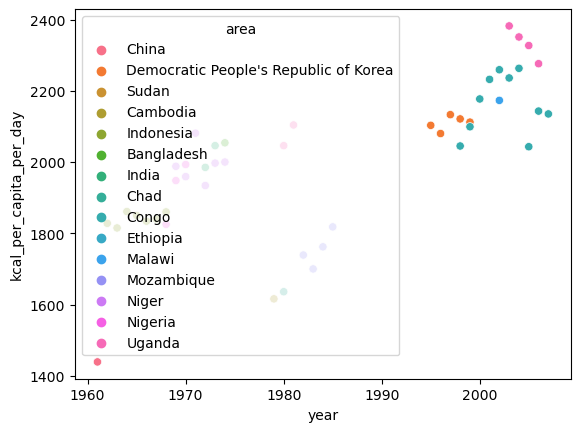

In [149]:
sns.scatterplot(data = famine_balance, x = 'year', y = 'kcal_per_capita_per_day', hue = 'area')

In [150]:
famine_countries = list(famine_balance.area.unique())
famine_countries

['China',
 "Democratic People's Republic of Korea",
 'Sudan',
 'Cambodia',
 'Indonesia',
 'Bangladesh',
 'India',
 'Chad',
 'Congo',
 'Ethiopia',
 'Malawi',
 'Mozambique',
 'Niger',
 'Nigeria',
 'Uganda']

In [151]:
famine_balance_historic = balance_historic_national_p[balance_historic_national_p['area'].isin(famine_countries)==True].copy()
# famine_balance_historic.to_csv('famine_balance_historic.csv')

In [152]:
famine_balance_historic.famine.value_counts()

0.0    732
1.0     63
Name: famine, dtype: int64

### Recent national food balances

In [153]:
balance_national_p.head()

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,Total Population - Both sexes_1000 persons,fat_supply_g_per_day Animal Products,fat_supply_g_per_day Grand Total,fat_supply_g_per_day Vegetal Products,food_supply_kcal_per_day Animal Products,food_supply_kcal_per_day Grand Total,food_supply_kcal_per_day Vegetal Products,protein_supply_g_per_day Animal Products,protein_supply_g_per_day Grand Total,protein_supply_g_per_day Vegetal Products
0,Australia and New Zealand,Australia,AUS,0,2010,22155.0,1.619752e+09,3.351387e+09,1.731856e+09,2.321844e+10,7.554855e+10,5.235226e+10,1.641021e+09,2.456325e+09,815525550.0
1,Australia and New Zealand,Australia,AUS,0,2011,22538.0,1.666234e+09,3.498123e+09,1.832114e+09,2.395789e+10,7.640382e+10,5.244593e+10,1.709282e+09,2.494055e+09,784773160.0
2,Australia and New Zealand,Australia,AUS,0,2012,22904.0,1.711387e+09,3.582873e+09,1.871486e+09,2.448438e+10,7.872105e+10,5.423667e+10,1.713219e+09,2.521730e+09,808511200.0
3,Australia and New Zealand,Australia,AUS,0,2013,23255.0,1.725754e+09,3.550108e+09,1.824355e+09,2.455728e+10,7.974140e+10,5.518412e+10,1.717149e+09,2.544097e+09,826947800.0
4,Australia and New Zealand,Australia,AUS,0,2014,23596.0,1.798959e+09,3.732887e+09,1.933928e+09,2.520053e+10,8.053315e+10,5.533262e+10,1.728171e+09,2.544357e+09,816185640.0


In [154]:
balance_national_p.least_developed_countries_ldc.value_counts()

0    1507
x     473
Name: least_developed_countries_ldc, dtype: int64

In [155]:
balance_national_p['least_developed_countries_ldc'] = balance_national_p['least_developed_countries_ldc'].str.replace('x','1').astype(int)

In [156]:
balance_national_p['kcal_per_capita_per_day'] = balance_national_p['food_supply_kcal_per_day Grand Total'] / (1000 * balance_national_p['Total Population - Both sexes_1000 persons'])
balance_national_p['protein_g_per_capita_per_day'] = balance_national_p['protein_supply_g_per_day Grand Total'] / (1000 * balance_national_p['Total Population - Both sexes_1000 persons'])
balance_national_p['fat_g_per_capita_per_day'] = balance_national_p['fat_supply_g_per_day Grand Total'] / (1000 * balance_national_p['Total Population - Both sexes_1000 persons'])
balance_national_p['animal_proportion'] = balance_national_p['food_supply_kcal_per_day Animal Products'] / balance_national_p['food_supply_kcal_per_day Grand Total']
balance_national_p['fat_g_per_kcal'] = balance_national_p['fat_g_per_capita_per_day'] / balance_national_p['kcal_per_capita_per_day']
balance_national_p['protein_g_per_kcal'] = balance_national_p['protein_g_per_capita_per_day'] / balance_national_p['kcal_per_capita_per_day']

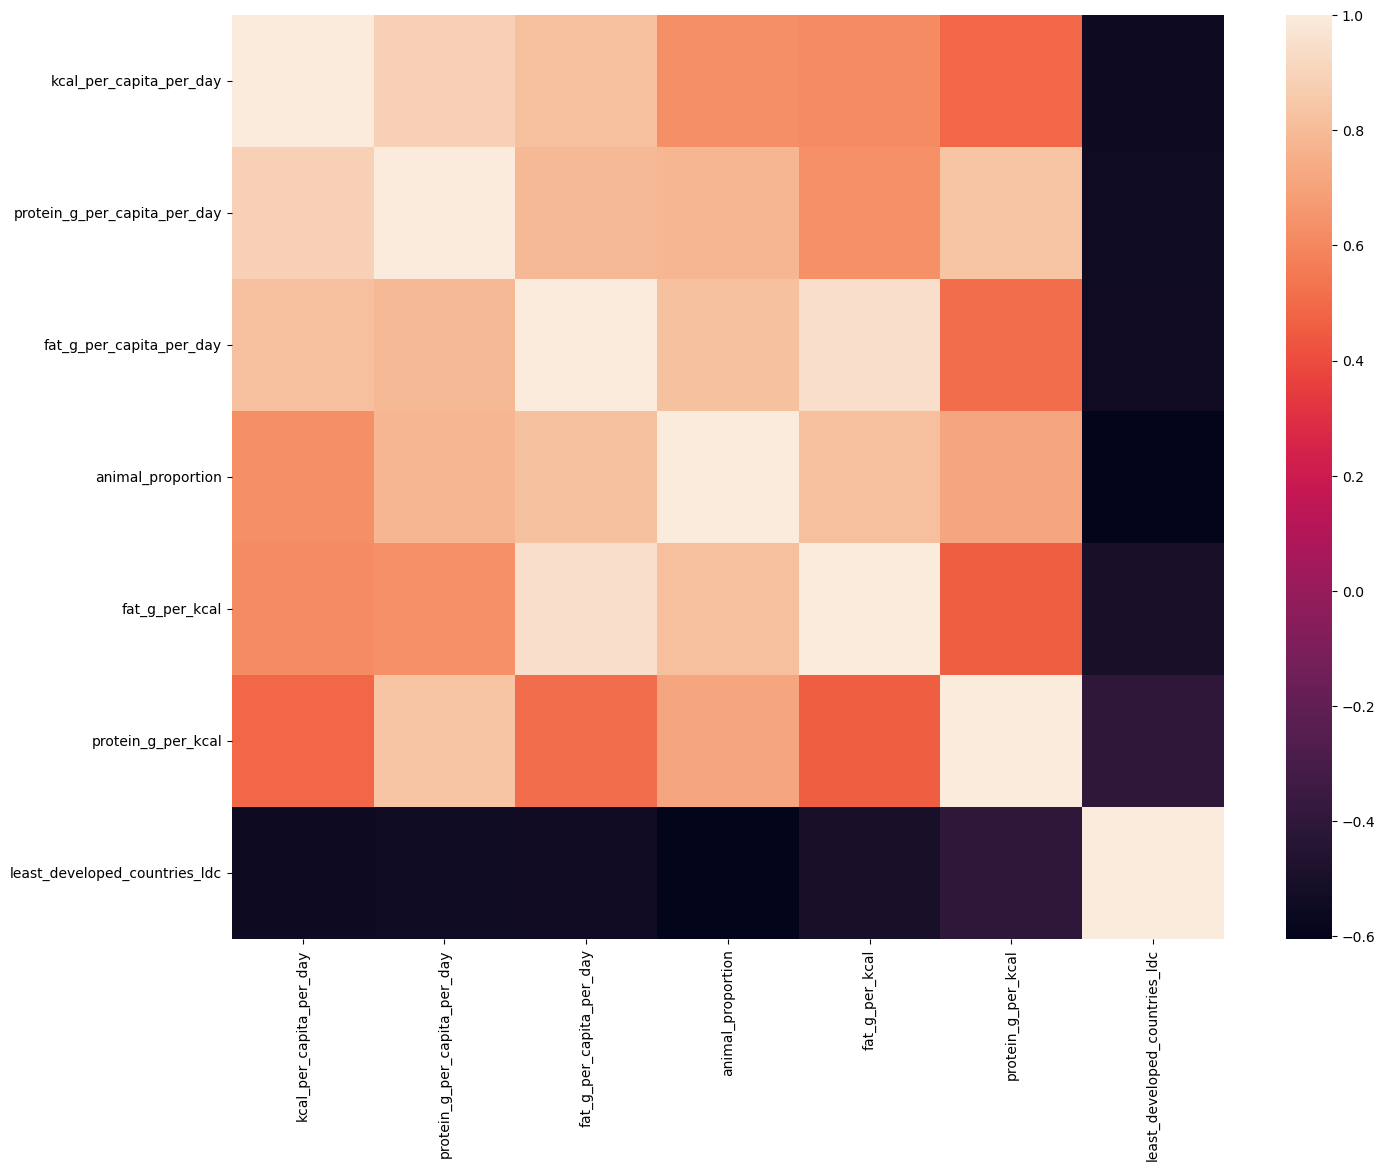

In [157]:
key_columns = ['kcal_per_capita_per_day','protein_g_per_capita_per_day',
               'fat_g_per_capita_per_day','animal_proportion',
               'fat_g_per_kcal','protein_g_per_kcal',
               'least_developed_countries_ldc']

corr_matrix=balance_national_p[key_columns].corr(method='pearson')
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(corr_matrix)
plt.show()

In [158]:
corr_matrix

,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,fat_g_per_kcal,protein_g_per_kcal,least_developed_countries_ldc
kcal_per_capita_per_day,1.000000,0.884457,0.814215,0.628179,0.613901,0.486400,-0.548348
protein_g_per_capita_per_day,0.884457,1.000000,0.788242,0.777487,0.633281,0.831005,-0.542691
fat_g_per_capita_per_day,0.814215,0.788242,1.000000,0.824290,0.949357,0.509392,-0.537347
animal_proportion,0.628179,0.777487,0.824290,1.000000,0.816729,0.713945,-0.604680
fat_g_per_kcal,0.613901,0.633281,0.949357,0.816729,1.000000,0.460617,-0.501669
protein_g_per_kcal,0.486400,0.831005,0.509392,0.713945,0.460617,1.000000,-0.406674
least_developed_countries_ldc,-0.548348,-0.542691,-0.537347,-0.604680,-0.501669,-0.406674,1.000000


In [ ]:
# let's cluster the countries into like groups

In [159]:
cluster_data = balance_national_p.groupby(['area']).agg({'kcal_per_capita_per_day':np.mean,
                                                         'protein_g_per_capita_per_day':np.mean,
                                                         'fat_g_per_capita_per_day':np.mean,
                                                         'animal_proportion':np.mean,
                                                         'fat_g_per_kcal':np.mean,
                                                         'protein_g_per_kcal':np.mean,
                                                         'Total Population - Both sexes_1000 persons':np.mean}).reset_index()
cluster_data

,area,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,fat_g_per_kcal,protein_g_per_kcal,Total Population - Both sexes_1000 persons
0,Afghanistan,2224.454545,58.154545,38.803636,0.090726,0.017434,0.026153,34212.736364
1,Albania,3282.636364,111.277273,111.453636,0.297186,0.033943,0.033894,2899.429091
2,Algeria,3400.636364,90.117273,93.924545,0.119934,0.027608,0.026504,39807.826364
3,Angola,2428.090909,51.655455,57.804545,0.089160,0.023798,0.021260,27971.596364
4,Antigua and Barbuda,2412.272727,80.186364,93.212727,0.312889,0.038652,0.033243,93.368182
...,...,...,...,...,...,...,...,...
175,Venezuela (Bolivarian Republic of),2563.090909,65.408182,90.180000,0.160379,0.035185,0.025366,29244.251818
176,Viet Nam,2855.818182,82.635455,74.443636,0.204925,0.026061,0.028924,92670.244545
177,Yemen,2119.818182,56.357273,42.466364,0.073726,0.020013,0.026558,26490.352727
178,Zambia,2128.545455,56.872727,49.826364,0.074929,0.023486,0.026798,15919.453636


In [160]:
balance_national_p[balance_national_p['area']=='Afghanistan']

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,Total Population - Both sexes_1000 persons,fat_supply_g_per_day Animal Products,fat_supply_g_per_day Grand Total,fat_supply_g_per_day Vegetal Products,food_supply_kcal_per_day Animal Products,food_supply_kcal_per_day Grand Total,food_supply_kcal_per_day Vegetal Products,protein_supply_g_per_day Animal Products,protein_supply_g_per_day Grand Total,protein_supply_g_per_day Vegetal Products,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,fat_g_per_kcal,protein_g_per_kcal
1012,Southern Asia,Afghanistan,AFG,1,2010,29186.00,419110960.0,1.070834e+09,6.517234e+08,6.012316e+09,6.333362e+10,5.732130e+10,344686660.0,1.728687e+09,1.384000e+09,2170.0,59.23,36.69,0.094931,0.016908,0.027295
1013,Southern Asia,Afghanistan,AFG,1,2011,30117.00,418023960.0,1.048373e+09,6.303488e+08,6.023400e+09,6.481178e+10,5.881850e+10,348453690.0,1.746786e+09,1.398633e+09,2152.0,58.00,34.81,0.092937,0.016176,0.026952
1014,Southern Asia,Afghanistan,AFG,1,2012,31161.00,435007560.0,1.138311e+09,7.029922e+08,6.356844e+09,6.727660e+10,6.091976e+10,370815900.0,1.801729e+09,1.430913e+09,2159.0,57.82,36.53,0.094488,0.016920,0.026781
1015,Southern Asia,Afghanistan,AFG,1,2013,32270.00,457265900.0,1.197217e+09,7.399511e+08,6.583080e+09,7.086492e+10,6.431411e+10,377236300.0,1.862302e+09,1.485065e+09,2196.0,57.71,37.10,0.092896,0.016894,0.026280
1016,Southern Asia,Afghanistan,AFG,1,2014,33371.00,556294570.0,1.384229e+09,8.276008e+08,8.209266e+09,7.558532e+10,6.737605e+10,465859160.0,2.007933e+09,1.542074e+09,2265.0,60.17,41.48,0.108609,0.018313,0.026565
1017,Southern Asia,Afghanistan,AFG,1,2015,34414.00,497626440.0,1.317368e+09,8.197415e+08,7.261354e+09,7.743150e+10,7.013573e+10,415721120.0,2.011498e+09,1.595777e+09,2250.0,58.45,38.28,0.093778,0.017013,0.025978
1018,Southern Asia,Afghanistan,AFG,1,2016,35383.00,496777320.0,1.440088e+09,9.433108e+08,7.218132e+09,7.883332e+10,7.161519e+10,408319820.0,2.068490e+09,1.660524e+09,2228.0,58.46,40.70,0.091562,0.018268,0.026239
1019,Southern Asia,Afghanistan,AFG,1,2017,36296.00,479470160.0,1.452929e+09,9.734587e+08,7.077720e+09,8.358969e+10,7.651197e+10,405063360.0,2.159612e+09,1.754549e+09,2303.0,59.50,40.03,0.084672,0.017382,0.025836
1020,Southern Asia,Afghanistan,AFG,1,2018,37172.00,478031920.0,1.541523e+09,1.063491e+09,7.025508e+09,8.438044e+10,7.735493e+10,398483840.0,2.143338e+09,1.744854e+09,2270.0,57.66,41.47,0.083260,0.018269,0.025401
1021,Southern Asia,Afghanistan,AFG,1,2019,38041.75,452696825.0,1.552484e+09,1.099787e+09,6.733390e+09,8.506135e+10,7.836600e+10,381178335.0,2.132621e+09,1.751442e+09,2236.0,56.06,40.81,0.079159,0.018251,0.025072


In [162]:
balance_national_p[balance_national_p['area']=='France']

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,Total Population - Both sexes_1000 persons,fat_supply_g_per_day Animal Products,fat_supply_g_per_day Grand Total,fat_supply_g_per_day Vegetal Products,food_supply_kcal_per_day Animal Products,food_supply_kcal_per_day Grand Total,food_supply_kcal_per_day Vegetal Products,protein_supply_g_per_day Animal Products,protein_supply_g_per_day Grand Total,protein_supply_g_per_day Vegetal Products,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,fat_g_per_kcal,protein_g_per_kcal
1936,Western Europe,France,FRA,0,2010,63231.00,6.117599e+09,1.028642e+10,4.168820e+09,7.644628e+10,2.230157e+11,1.465695e+11,4.441978e+09,7.108429e+09,2.666451e+09,3527.0,112.42,162.68,0.342784,0.046124,0.031874
1937,Western Europe,France,FRA,0,2011,63582.00,5.916305e+09,1.020682e+10,4.290513e+09,7.477243e+10,2.227913e+11,1.480189e+11,4.427215e+09,7.058874e+09,2.631659e+09,3504.0,111.02,160.53,0.335616,0.045813,0.031684
1938,Western Europe,France,FRA,0,2012,63937.00,5.894991e+09,1.003427e+10,4.139281e+09,7.442267e+10,2.206466e+11,1.462239e+11,4.412932e+09,7.063120e+09,2.650189e+09,3451.0,110.47,156.94,0.337294,0.045477,0.032011
1939,Western Europe,France,FRA,0,2013,64291.00,5.978420e+09,1.018177e+10,4.202703e+09,7.534905e+10,2.232826e+11,1.479336e+11,4.417435e+09,7.064938e+09,2.647503e+09,3473.0,109.89,158.37,0.337460,0.045600,0.031641
1940,Western Europe,France,FRA,0,2014,66088.00,5.725864e+09,9.866938e+09,4.141074e+09,7.256462e+10,2.254262e+11,1.527955e+11,4.240867e+09,7.080668e+09,2.839801e+09,3411.0,107.14,149.30,0.321900,0.043770,0.031410
1941,Western Europe,France,FRA,0,2015,66356.00,5.695335e+09,9.863156e+09,4.167820e+09,7.226168e+10,2.314497e+11,1.592544e+11,4.235503e+09,7.224841e+09,2.989338e+09,3488.0,108.88,148.64,0.312213,0.042615,0.031216
1942,Western Europe,France,FRA,0,2016,66582.00,5.822596e+09,9.963330e+09,4.141400e+09,7.357311e+10,2.351676e+11,1.615945e+11,4.251927e+09,7.294724e+09,3.043463e+09,3532.0,109.56,149.64,0.312854,0.042367,0.031019
1943,Western Europe,France,FRA,0,2017,66769.00,5.900377e+09,9.955926e+09,4.054881e+09,7.444744e+10,2.343592e+11,1.599785e+11,4.288573e+09,7.301858e+09,3.013953e+09,3510.0,109.36,149.11,0.317664,0.042481,0.031157
1944,Western Europe,France,FRA,0,2018,66931.00,5.905322e+09,1.003296e+10,4.128304e+09,7.442727e+10,2.328529e+11,1.584257e+11,4.293624e+09,7.263352e+09,2.969728e+09,3479.0,108.52,149.90,0.319632,0.043087,0.031193
1945,Western Europe,France,FRA,0,2019,65129.73,6.237474e+09,9.992203e+09,3.754729e+09,8.095625e+10,2.291915e+11,1.482353e+11,4.942695e+09,7.784305e+09,2.841610e+09,3519.0,119.52,153.42,0.353225,0.043598,0.033964


In [163]:
from sklearn.preprocessing import MinMaxScaler

X = cluster_data.drop(['area'],axis=1)
y = cluster_data['area']

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.23970809, 0.25559745, 0.15118095, ..., 0.19754957, 0.47044434,
        0.02380519],
       [0.76129693, 0.75515717, 0.61999314, ..., 0.57734963, 0.78223277,
        0.00201617],
       [0.81946036, 0.55617108, 0.5068775 , ..., 0.43161621, 0.4845895 ,
        0.02769847],
       ...,
       [0.18813174, 0.23869611, 0.17481661, ..., 0.25688169, 0.486766  ,
        0.01843166],
       [0.19243351, 0.24354338, 0.22231087, ..., 0.33676853, 0.49642152,
        0.01107601],
       [0.18530871, 0.26856625, 0.34946478, ..., 0.55259105, 0.55163108,
        0.00959318]])

C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

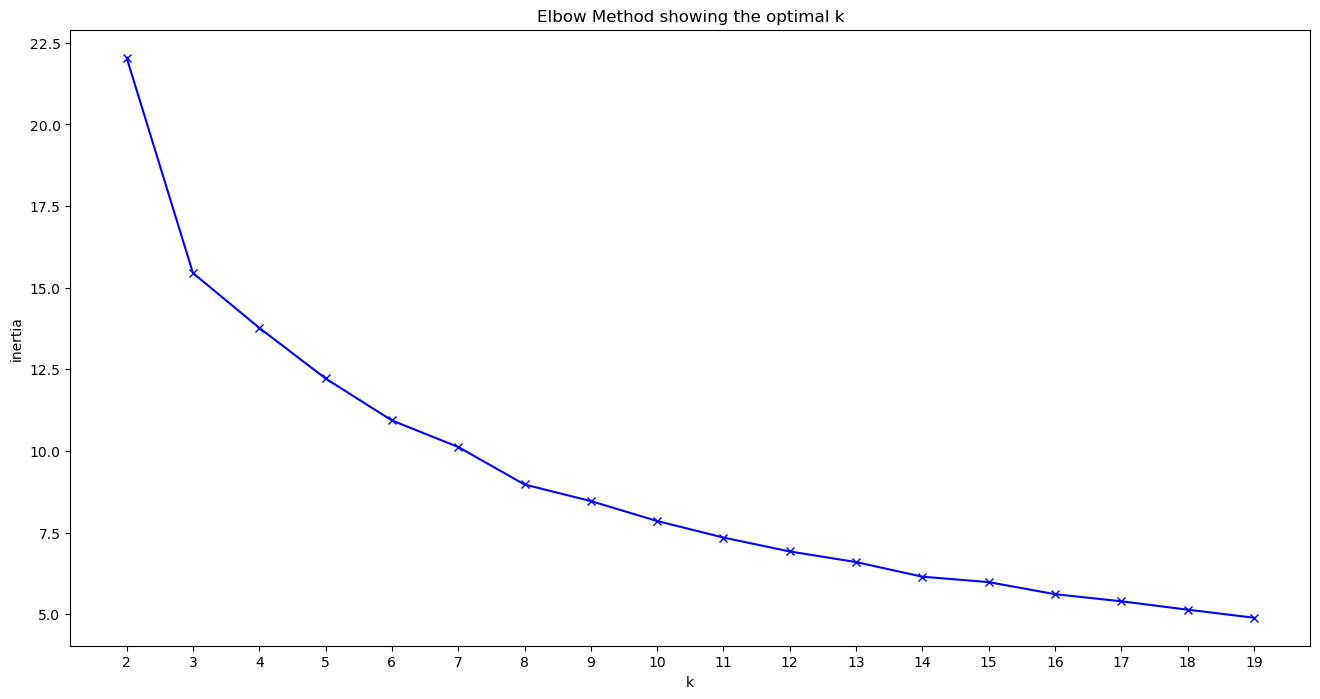

In [164]:
from sklearn import cluster
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init = 10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

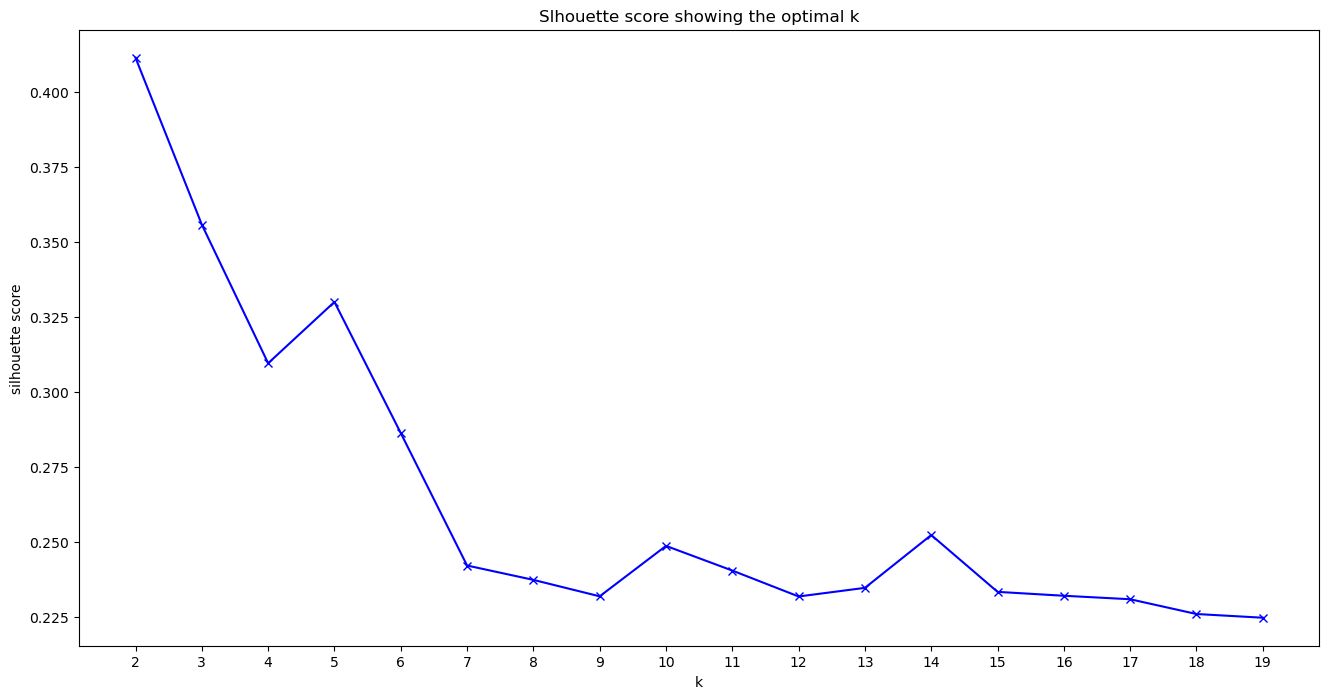

In [165]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init = 10)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [166]:
kmeans = KMeans(n_clusters=5, random_state=1234, n_init = 10)
kmeans.fit(X_scaled)
cluster = kmeans.predict(X_scaled)

cluster_data['cluster'] = cluster

summary = cluster_data.groupby(['cluster','area']).agg({'kcal_per_capita_per_day':np.mean,
                                              'protein_g_per_capita_per_day':np.mean,
                                              'fat_g_per_capita_per_day':np.mean,
                                              'animal_proportion':np.mean,
                                              'fat_g_per_kcal':np.mean,
                                              'protein_g_per_kcal':np.mean,
                                              'Total Population - Both sexes_1000 persons':np.mean}).reset_index()

pd.set_option('display.max_rows', None)
display(summary)
pd.set_option('display.max_rows', 30)

C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,cluster,area,kcal_per_capita_per_day,protein_g_per_capita_per_day,fat_g_per_capita_per_day,animal_proportion,fat_g_per_kcal,protein_g_per_kcal,Total Population - Both sexes_1000 persons
0,0,Antigua and Barbuda,2412.272727,80.186364,93.212727,0.312889,0.038652,0.033243,9.336818e+01
1,0,Bahamas,2620.727273,83.321818,102.102727,0.315494,0.038960,0.031787,3.745200e+02
2,0,Belize,2703.545455,69.637273,79.906364,0.198319,0.029509,0.025758,3.604527e+02
3,0,Bulgaria,2821.090909,82.355455,98.080909,0.239626,0.034733,0.029198,7.193505e+03
4,0,Colombia,2888.909091,68.137273,85.030000,0.184141,0.029417,0.023567,4.781039e+04
5,0,Costa Rica,2928.909091,78.307273,96.149091,0.222702,0.032789,0.026721,4.842971e+03
6,0,Dominican Republic,2788.636364,62.279091,97.812727,0.155949,0.035098,0.022309,1.027808e+04
7,0,Ecuador,2575.454545,64.617273,97.685455,0.225170,0.037922,0.025086,1.627061e+04
8,0,Grenada,2449.272727,71.998182,81.287273,0.236157,0.033164,0.029400,1.094109e+02
9,0,Honduras,2645.545455,60.319091,84.917273,0.124395,0.032095,0.022797,9.113248e+03


In [167]:
# summary.to_csv('balance_summary.csv')

### Producers, exporters, importers

In [176]:
data = pd.read_csv('processed data/balance_final.csv').drop(['Unnamed: 0'], axis = 1)

data

C:\Users\eliza\AppData\Local\Temp\ipykernel_17272\339981416.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('processed data/balance_final.csv').drop(['Unnamed: 0'], axis = 1)


,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,item_code_cpc,item,Export Quantity_1000 tonnes,Fat supply quantity _g/capita/day,Food supply _kcal/capita/day,Food_1000 tonnes,Import Quantity_1000 tonnes,Losses_1000 tonnes,Production_1000 tonnes,Protein supply quantity _g/capita/day,Total Population - Both sexes_1000 persons,food_supply_kcal_per_day,kcal_per_1000tonnes,import_multiple,export_multiple,loss_multiple,losses_kcal_per_day,fat_supply_g_per_day,protein_supply_g_per_day
0,Australia and New Zealand,Australia,AUS,0,2010,'S2511,Wheat and products,16143.00,2.23,539.91,1510.00,170.0,218.0,21834.00,16.96,22155.00,1.196171e+10,2.891406e+09,0.112583,10.690728,0.144371,1.726922e+09,49405650.0,375748800.0
1,Australia and New Zealand,Australia,AUS,0,2010,'S2513,Barley and products,4789.00,0.00,0.00,0.00,7.0,33.0,7865.00,0.00,22155.00,0.000000e+00,NaN,inf,inf,inf,NaN,0.0,0.0
2,Australia and New Zealand,Australia,AUS,0,2010,'S2514,Maize and products,11.00,0.12,43.70,100.00,16.0,2.0,328.00,0.95,22155.00,9.681735e+08,3.533833e+09,0.160000,0.110000,0.020000,1.936347e+07,2658600.0,21047250.0
3,Australia and New Zealand,Australia,AUS,0,2010,'S2515,Rye and products,0.00,0.00,0.39,1.00,1.0,1.0,29.00,0.01,22155.00,8.640450e+06,3.153764e+09,1.000000,0.000000,1.000000,8.640450e+06,0.0,221550.0
4,Australia and New Zealand,Australia,AUS,0,2010,'S2516,Oats,347.00,0.01,0.76,3.00,1.0,23.0,1162.00,0.03,22155.00,1.683780e+07,2.048599e+09,0.333333,115.666667,7.666667,1.290898e+08,221550.0,664650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234680,Western Europe,Switzerland,CHE,0,2020,'S2946,Animal fats,11.00,17.89,159.00,72.00,26.0,2.0,105.00,0.14,8654.62,1.376085e+09,6.975984e+09,0.361111,0.152778,0.027778,3.822457e+07,154831151.8,1211646.8
234681,Western Europe,Switzerland,CHE,0,2020,'S2948,Milk - Excluding Butter,589.00,30.74,468.00,2535.00,595.0,0.0,3832.00,29.86,8654.62,4.050362e+09,5.831882e+08,0.234714,0.232347,0.000000,0.000000e+00,266043018.8,258426953.2
234682,Western Europe,Switzerland,CHE,0,2020,'S2949,Eggs,0.00,2.98,42.00,93.00,38.0,6.0,66.00,3.43,8654.62,3.634940e+08,1.426616e+09,0.408602,0.000000,0.064516,2.345123e+07,25790767.6,29685346.6
234683,Western Europe,Switzerland,CHE,0,2020,'S2960,"Fish, Seafood",0.82,1.19,29.00,138.43,134.9,0.0,3.43,4.15,8654.62,2.509840e+08,6.617724e+08,0.974500,0.005924,0.000000,0.000000e+00,10298997.8,35916673.0


In [208]:
producers = data[(data['item_code_cpc'].str[:4]=="'S29")&
                 (data['item'].isin(['Grand Total','Vegetal Products','Animal Products'])==False)]

producers

,sub_region_name,area,iso_alpha3_code,least_developed_countries_ldc,year,item_code_cpc,item,Export Quantity_1000 tonnes,Fat supply quantity _g/capita/day,Food supply _kcal/capita/day,Food_1000 tonnes,Import Quantity_1000 tonnes,Losses_1000 tonnes,Production_1000 tonnes,Protein supply quantity _g/capita/day,Total Population - Both sexes_1000 persons,food_supply_kcal_per_day,kcal_per_1000tonnes,import_multiple,export_multiple,loss_multiple,losses_kcal_per_day,fat_supply_g_per_day,protein_supply_g_per_day
97,Australia and New Zealand,Australia,AUS,0,2010,'S2905,Cereals - Excluding Beer,21707.00,2.62,698.0,2014.00,518.0,382.0,33495.00,20.21,22155.00,1.546419e+10,2.802596e+09,0.257200,10.778054,0.189672,2.933128e+09,58046100.0,447752550.0
98,Australia and New Zealand,Australia,AUS,0,2010,'S2907,Starchy Roots,48.00,0.15,95.0,1253.00,118.0,29.0,1328.00,2.43,22155.00,2.104725e+09,6.131082e+08,0.094174,0.038308,0.023144,4.871271e+07,3323250.0,53836650.0
99,Australia and New Zealand,Australia,AUS,0,2010,'S2908,Sugar Crops,0.00,0.00,0.0,0.00,0.0,1680.0,31235.00,0.00,22155.00,0.000000e+00,NaN,NaN,NaN,inf,NaN,0.0,0.0
100,Australia and New Zealand,Australia,AUS,0,2010,'S2909,Sugar & Sweeteners,3354.00,0.00,488.0,2902.00,287.0,1.0,4616.00,0.00,22155.00,1.081164e+10,1.359838e+09,0.098897,1.155755,0.000345,3.725582e+06,0.0,0.0
101,Australia and New Zealand,Australia,AUS,0,2010,'S2911,Pulses,1055.00,0.37,68.0,159.00,15.0,120.0,2513.00,4.71,22155.00,1.506540e+09,3.458409e+09,0.094340,6.635220,0.754717,1.137011e+09,8197350.0,104350050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234680,Western Europe,Switzerland,CHE,0,2020,'S2946,Animal fats,11.00,17.89,159.0,72.00,26.0,2.0,105.00,0.14,8654.62,1.376085e+09,6.975984e+09,0.361111,0.152778,0.027778,3.822457e+07,154831151.8,1211646.8
234681,Western Europe,Switzerland,CHE,0,2020,'S2948,Milk - Excluding Butter,589.00,30.74,468.0,2535.00,595.0,0.0,3832.00,29.86,8654.62,4.050362e+09,5.831882e+08,0.234714,0.232347,0.000000,0.000000e+00,266043018.8,258426953.2
234682,Western Europe,Switzerland,CHE,0,2020,'S2949,Eggs,0.00,2.98,42.0,93.00,38.0,6.0,66.00,3.43,8654.62,3.634940e+08,1.426616e+09,0.408602,0.000000,0.064516,2.345123e+07,25790767.6,29685346.6
234683,Western Europe,Switzerland,CHE,0,2020,'S2960,"Fish, Seafood",0.82,1.19,29.0,138.43,134.9,0.0,3.43,4.15,8654.62,2.509840e+08,6.617724e+08,0.974500,0.005924,0.000000,0.000000e+00,10298997.8,35916673.0


In [209]:
producers.isna().sum()

sub_region_name                                  0
area                                             0
iso_alpha3_code                                  0
least_developed_countries_ldc                    0
year                                             0
item_code_cpc                                    0
item                                             0
Export Quantity_1000 tonnes                      0
Fat supply quantity _g/capita/day                0
Food supply _kcal/capita/day                     0
Food_1000 tonnes                                 0
Import Quantity_1000 tonnes                      0
Losses_1000 tonnes                               0
Production_1000 tonnes                           0
Protein supply quantity _g/capita/day            0
Total Population - Both sexes_1000 persons       0
food_supply_kcal_per_day                         0
kcal_per_1000tonnes                           5287
import_multiple                               4761
export_multiple                

In [210]:
producers.dtypes

sub_region_name                                object
area                                           object
iso_alpha3_code                                object
least_developed_countries_ldc                  object
year                                            int64
item_code_cpc                                  object
item                                           object
Export Quantity_1000 tonnes                   float64
Fat supply quantity _g/capita/day             float64
Food supply _kcal/capita/day                  float64
Food_1000 tonnes                              float64
Import Quantity_1000 tonnes                   float64
Losses_1000 tonnes                            float64
Production_1000 tonnes                        float64
Protein supply quantity _g/capita/day         float64
Total Population - Both sexes_1000 persons    float64
food_supply_kcal_per_day                      float64
kcal_per_1000tonnes                           float64
import_multiple             

In [211]:
producers['kcal_per_1000tonnes']=producers['kcal_per_1000tonnes'].replace(np.inf,None)

item_average = pd.DataFrame(producers.groupby('item')['kcal_per_1000tonnes'].mean()).reset_index()

item_average.rename(columns={'kcal_per_1000tonnes': 'average'}, inplace=True)

item_average

C:\Users\eliza\AppData\Local\Temp\ipykernel_17272\4042785772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producers['kcal_per_1000tonnes']=producers['kcal_per_1000tonnes'].replace(np.inf,None)


,item,average
0,Alcoholic Beverages,7.155548e+08
1,Animal fats,8.501059e+09
2,"Aquatic Products, Other",3.764475e+08
3,Cereals - Excluding Beer,2.885475e+09
4,Eggs,1.348677e+09
5,"Fish, Seafood",7.110312e+08
6,Fruits - Excluding Wine,5.367737e+08
7,Meat,1.768380e+09
8,Milk - Excluding Butter,1.171574e+09
9,Miscellaneous,1.029621e+09


In [212]:
producers = pd.merge(producers, item_average, on='item', how='left')
producers["kcal_per_1000tonnes"].fillna(producers["average"], inplace=True)

In [214]:
producers.columns

Index(['sub_region_name', 'area', 'iso_alpha3_code',
       'least_developed_countries_ldc', 'year', 'item_code_cpc', 'item',
       'Export Quantity_1000 tonnes', 'Fat supply quantity _g/capita/day',
       'Food supply _kcal/capita/day', 'Food_1000 tonnes',
       'Import Quantity_1000 tonnes', 'Losses_1000 tonnes',
       'Production_1000 tonnes', 'Protein supply quantity _g/capita/day',
       'Total Population - Both sexes_1000 persons',
       'food_supply_kcal_per_day', 'kcal_per_1000tonnes', 'import_multiple',
       'export_multiple', 'loss_multiple', 'losses_kcal_per_day',
       'fat_supply_g_per_day', 'protein_supply_g_per_day', 'average'],
      dtype='object')

In [215]:
producers['kcal_produced'] = producers['Production_1000 tonnes'] * producers["kcal_per_1000tonnes"]
producers['kcal_imported'] = producers['Import Quantity_1000 tonnes'] * producers["kcal_per_1000tonnes"]
producers['kcal_exported'] = producers['Export Quantity_1000 tonnes'] * producers["kcal_per_1000tonnes"]
producers['kcal_lost'] = producers['Losses_1000 tonnes'] * producers["kcal_per_1000tonnes"]

In [219]:
trade = producers[['sub_region_name', 'area', 'iso_alpha3_code',
                  'least_developed_countries_ldc', 'year', 'item_code_cpc',
                  'Total Population - Both sexes_1000 persons',
                  'Food supply _kcal/capita/day',
                  'kcal_produced',
                  'kcal_imported',
                  'kcal_exported',
                  'kcal_lost']].copy()

trade.to_csv('trade.csv')

trade.isna().sum()

sub_region_name                               0
area                                          0
iso_alpha3_code                               0
least_developed_countries_ldc                 0
year                                          0
item_code_cpc                                 0
Total Population - Both sexes_1000 persons    0
Food supply _kcal/capita/day                  0
kcal_produced                                 0
kcal_imported                                 0
kcal_exported                                 0
kcal_lost                                     0
dtype: int64

In [222]:
trade.groupby('year')['kcal_produced','kcal_imported','kcal_exported','kcal_lost'].sum()

C:\Users\eliza\AppData\Local\Temp\ipykernel_17272\3520748173.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trade.groupby('year')['kcal_produced','kcal_imported','kcal_exported','kcal_lost'].sum()


,kcal_produced,kcal_imported,kcal_exported,kcal_lost
year,,,,
2010,1.594265e+16,2.730096e+15,2.792294e+15,5.636419e+14
2011,1.681944e+16,2.846599e+15,2.914516e+15,5.755578e+14
2012,1.677936e+16,3.015732e+15,3.136990e+15,5.924451e+14
2013,1.768369e+16,3.123839e+15,3.191413e+15,6.218232e+14
2014,2.135975e+16,3.378722e+15,3.398250e+15,8.717023e+14
2015,3.790174e+16,3.541350e+15,3.530355e+15,1.705386e+15
2016,1.958289e+16,3.601717e+15,3.625485e+15,7.806210e+14
2017,2.072420e+16,3.827947e+15,3.835648e+15,8.307868e+14
2018,2.650116e+16,3.828967e+15,3.857828e+15,1.115279e+15
